In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [35]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "time", "Unnamed: 0", "errorLimit"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data.head()

,f1,grad,sol,error,time_minutes,1,2,3,4,5,6
0,200,600,"[3.7620639313646738, 4.101053254116105, 4.5373...",3.751611,30.271394,201.932126,723.374011,1386.300401,2021.649964,2757.134197,3323.542024


In [36]:
dataS = data.drop(["f1", "grad", "error", "time_minutes", 1, 2, 3, 4, 5, 6], axis=1)

dataS['E'] = [x[1:-1] for x in dataS['sol']]
dataS = dataS.join(dataS['E'].str.split(', ', expand=True).apply(pd.to_numeric))
dataS.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
dataS.drop(['E', 'sol'], axis=1, inplace=True)

sols_E = dataS.values.T.tolist()
sols_E

[[3.7620639313646738],
 [4.101053254116104],
 [4.537362719319077],
 [2.9486079356749726],
 [3.4043987064929726],
 [4.269884033132296],
 [2.4937531459509836],
 [3.1546564862672497],
 [3.0759500425208532],
 [3.995000317013039],
 [2.3004087233051638],
 [2.778410234122896],
 [3.539237527196735],
 [3.0674718535919445],
 [3.2825621509264966],
 [3.4686084447396937],
 [3.1862218020679247],
 [3.588211478501265],
 [3.2340804368756046],
 [2.8650967311657785],
 [2.945955943169668],
 [4.335958335345366],
 [4.4039102764305005],
 [2.5207492376003238],
 [3.7339823272824484],
 [2.7956158114401144],
 [3.1876052698391675],
 [2.596864369293388],
 [5.083026413153168],
 [2.3389537192603425],
 [5.373820654472857],
 [2.969561745640972],
 [4.163404471447007],
 [4.581749465330991],
 [3.5432168975742804],
 [2.840649080745792],
 [2.844486019307966],
 [3.1217032633228765],
 [3.748126081683521],
 [2.7432755409118603]]

### Log_10(E/p) for each solution

TypeError: Image data cannot be converted to float

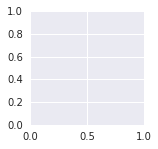

In [37]:
from sklearn.cluster import KMeans

dis_ind = []

s = sols_E

for k in range(1, 3):

    kmeans = KMeans(n_clusters=k)

    fig = plt.figure(figsize=(15, 100))

    
    avg_dis_tot = 0
    for n, s in enumerate(sols_Ep):

        fig.add_subplot(40, 3, n*3+1)
        plt.imshow([s[x:40:4] for x in range(4)])
        plt.title("Error = {}%".format(data["error"][n]))
        plt.axis("off")
        plt.colorbar()

        s_array = np.array(s).reshape(-1, 1)
        kmeans.fit_predict(s_array) 
        s_labels = kmeans.labels_
        avg_dis = np.sqrt(-kmeans.score(s_array)/40)
        avg_dis_tot = avg_dis_tot + avg_dis
    #     print(s_labels)
    #     print(kmeans.cluster_centers_)

        fig.add_subplot(40, 3, n*3+2)
        plt.imshow([s_labels[x:40:4] for x in range(4)], cmap="Accent")
        plt.title("Personalised clusters, d = {:.3}".format(avg_dis))
        plt.axis("off")



    plt.show()
    
    dis_ind.append(avg_dis_tot)

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(range(1, 16), [x/40 for x in dis_ind])
plt.plot(range(1, 16), [x/40 for x in dis_full])
plt.title("K-means score for individual and shared clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Average distance to cluster centre")
plt.legend(["Individual clusters", "Shared clusters"])
plt.plot()